In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [2]:
df = pd.read_csv("output/score.csv")
df

,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,63
0,0.375,0.250,0.750,0.000,0.125,0.250,0.375,0.000,0.375,0.125,...,0.250,0.250,0.375,0.500,0.375,0.500,0.375,0.125,0.625,0.125
1,0.333,0.444,0.111,0.444,0.333,0.444,0.222,0.111,0.333,0.222,...,0.111,0.333,0.333,0.222,0.222,0.333,0.222,0.444,0.444,0.333
2,0.333,0.333,0.417,0.167,0.167,0.250,0.417,0.250,0.333,0.333,...,0.083,0.333,0.250,0.417,0.167,0.417,0.167,0.167,0.167,0.083
3,0.167,0.250,0.167,0.333,0.000,0.333,0.083,0.083,0.333,0.250,...,0.167,0.167,0.333,0.083,0.333,0.000,0.250,0.250,0.167,0.250
4,0.154,0.308,0.154,0.154,0.308,0.308,0.077,0.308,0.231,0.231,...,0.077,0.385,0.077,0.385,0.154,0.231,0.154,0.385,0.231,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000,0.000,0.167,0.167,0.500,0.500,0.667,0.167,0.500,0.333,...,0.167,0.167,0.167,0.000,0.000,0.167,0.167,0.167,0.000,0.167
97,0.500,0.500,0.500,0.500,0.500,0.000,0.500,0.000,0.500,0.000,...,0.500,0.500,0.500,0.500,0.000,0.500,1.000,0.500,0.500,0.500
98,0.308,0.385,0.077,0.154,0.077,0.231,0.308,0.231,0.000,0.538,...,0.231,0.154,0.308,0.385,0.154,0.308,0.308,0.385,0.231,0.462
99,0.154,0.077,0.000,0.077,0.154,0.000,0.000,0.154,0.154,0.077,...,0.000,0.000,0.077,0.077,0.077,0.231,0.154,0.077,0.231,0.231


In [3]:
print(df.values)
print(np.median(df.values))
print(np.mean(df.values))

[[0.375 0.25  0.75  ... 0.125 0.625 0.125]
 [0.333 0.444 0.111 ... 0.444 0.444 0.333]
 [0.333 0.333 0.417 ... 0.167 0.167 0.083]
 ...
 [0.308 0.385 0.077 ... 0.385 0.231 0.462]
 [0.154 0.077 0.    ... 0.077 0.231 0.231]
 [0.25  0.167 0.333 ... 0.25  0.25  0.333]]
0.231
0.222010215307245


In [11]:
def scatterplot(x_data, y_data, title, x_label="electrode_number", y_label="score", color = "g", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots(figsize=(15,7))

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 15, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.savefig("graphics/" + title + '.jpg')

In [12]:
x_data = [[str(j) for j in range(1, df.values.shape[1] + 1)] for i in range(1, 102)]
y_data = df.values
#x_data, y_data

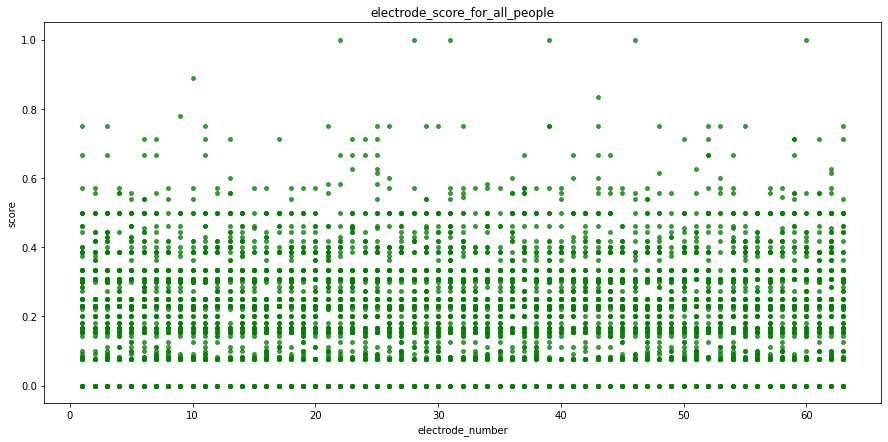

In [13]:
scatterplot(x_data, y_data, "electrode_score_for_all_people")

In [7]:
df.values.mean(), np.median(df.values)

(0.222010215307245, 0.231)

In [8]:
def barplot(title, x_label="electrode_number", y_label="mean_score"):
    
    # Create the plot object
    fig, ax = plt.subplots(figsize=(17, 7))
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    mean_score = [df[col].mean() for col in df]
    
    i = 0
    for col in df:
        ax.bar(str(i), df[col].mean(), width=1, color='b', edgecolor='k', alpha=0.75)
        ax.errorbar(i, df[col].mean(), yerr=np.std(mean_score), color = 'r', ls = 'none', lw = 2, capthick = 2)
        i += 1
    
    plt.savefig("graphics/" + title + '.jpg')
    plt.show()

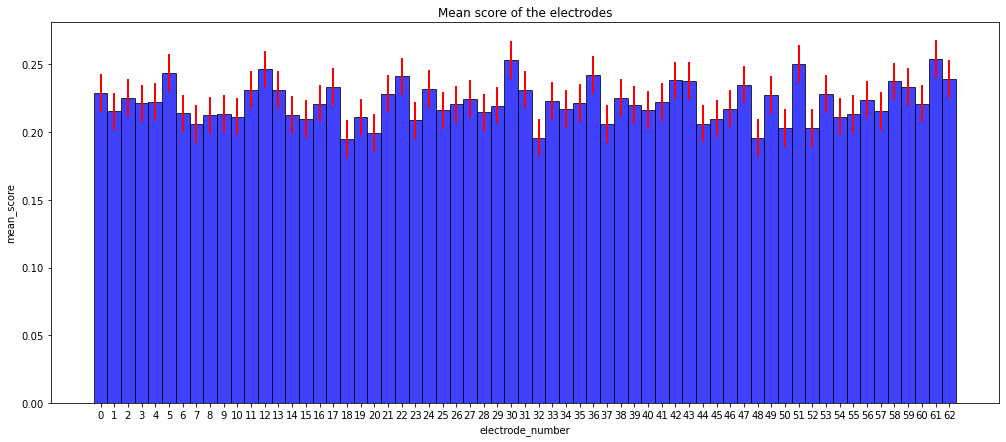

In [9]:
barplot("Mean score of the electrodes")